In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title 전처리
import numpy as np
import pandas as pd
data_route = '/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv'  # 기사 감정 + 음원 점수
stock_data = pd.read_csv(data_route, encoding='utf-8') #euc-kr
stock_data = stock_data.sort_values(by='Date', ascending=True)
stock_data = stock_data[stock_data['Date'] >= '2018.12.31']
stock_data['종가'] = stock_data['종가'].str.replace(',', '').astype(float)
stock_data['시가'] = stock_data['시가'].str.replace(',', '').astype(float)
stock_data['고가'] = stock_data['고가'].str.replace(',', '').astype(float)
stock_data['저가'] = stock_data['저가'].str.replace(',', '').astype(float)
stock_data['거래량'] = stock_data['거래량'].str.replace(',', '').astype(float)

stock_data_h = stock_data[stock_data['entertain'] == '하이브'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_s = stock_data[stock_data['entertain'] == '에스엠'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_c = stock_data[stock_data['entertain'] == '큐브엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_j = stock_data[stock_data['entertain'] == 'JYP Ent.'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_y = stock_data[stock_data['entertain'] == '와이지엔터테인먼트'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_f = stock_data[stock_data['entertain'] == '에프엔씨엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터



stock_data = pd.read_csv('/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/merged_stock.csv', encoding='utf-8') #euc-kr

stock_data = stock_data.rename(columns={'날짜': 'Date'})
stock_data = stock_data.sort_values(by='Date', ascending=True)
stock_data = stock_data.drop(columns = '전일비')
stock_data = stock_data[stock_data['Date'] >= '2018.12.31']
stock_data['종가'] = stock_data['종가'].str.replace(',', '').astype(float)
stock_data['시가'] = stock_data['시가'].str.replace(',', '').astype(float)
stock_data['고가'] = stock_data['고가'].str.replace(',', '').astype(float)
stock_data['저가'] = stock_data['저가'].str.replace(',', '').astype(float)
stock_data['거래량'] = stock_data['거래량'].str.replace(',', '').astype(float)
stock_data_oh = stock_data[stock_data['entertain'] == '하이브'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_os = stock_data[stock_data['entertain'] == '에스엠'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_oc = stock_data[stock_data['entertain'] == '큐브엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_oj = stock_data[stock_data['entertain'] == 'JYP Ent.'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_oy = stock_data[stock_data['entertain'] == '와이지엔터테인먼트'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터
stock_data_of = stock_data[stock_data['entertain'] == '에프엔씨엔터'] # 하이브 에스엠 큐브엔터 JYP Ent. 와이지엔터테인먼트 에프엔씨엔터






stock_data_oj

,Date,종가,시가,고가,저가,거래량,entertain
5446,2019.01.02,29050.0,30500.0,30800.0,28950.0,482873.0,JYP Ent.
5445,2019.01.03,28300.0,29150.0,29650.0,28250.0,463812.0,JYP Ent.
5444,2019.01.04,30250.0,28300.0,30300.0,28100.0,487820.0,JYP Ent.
5443,2019.01.07,31350.0,30850.0,32150.0,30400.0,876522.0,JYP Ent.
5442,2019.01.08,31500.0,31600.0,31800.0,30800.0,357678.0,JYP Ent.
...,...,...,...,...,...,...,...
4334,2023.07.04,136000.0,130300.0,138400.0,128000.0,569405.0,JYP Ent.
4333,2023.07.05,135800.0,134600.0,137600.0,131000.0,429583.0,JYP Ent.
4332,2023.07.06,132500.0,136000.0,136900.0,131800.0,445269.0,JYP Ent.
4331,2023.07.07,130800.0,132000.0,133300.0,129100.0,306242.0,JYP Ent.


In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#stock_data = stock_data.drop(columns='entertain')
stock_data_h = stock_data_h.drop(columns='entertain')
stock_data_s = stock_data_s.drop(columns='entertain')
stock_data_c = stock_data_c.drop(columns='entertain')
stock_data_j = stock_data_j.drop(columns='entertain')
stock_data_y = stock_data_y.drop(columns='entertain')
stock_data_f = stock_data_f.drop(columns='entertain')
stock_data_oh = stock_data_oh.drop(columns='entertain')
stock_data_os = stock_data_os.drop(columns='entertain')
stock_data_oc = stock_data_oc.drop(columns='entertain')
stock_data_oj = stock_data_oj.drop(columns='entertain')
stock_data_oy = stock_data_oy.drop(columns='entertain')
stock_data_of = stock_data_of.drop(columns='entertain')

In [6]:
#회사 선택
stock_data = stock_data_h
# 시가 저장
original_open = stock_data['시가'].values

# plot에 사용할 날짜데이터 저장
dates = pd.to_datetime(stock_data['Date'])

cols = list(stock_data)[1:9]
stock_data = stock_data[cols]

print(stock_data)

# 정규화
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)




# @title 데이터 분할
# 데이터 분할
n_train = int(0.9*stock_data_scaled.shape[0])
print(stock_data_scaled.shape[0])
print(n_train)
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]
# print(test_dates.head(5))

pred_days = 1  # 예측 기간
seq_len = 7   # 미래 예측에 사용할 기간


trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)






            종가        시가        고가        저가       거래량  ScoreSum  ScoreCount  \
4329  162000.0  162500.0  164000.0  160500.0  162232.0      39.0         8.0   
4328  158500.0  162000.0  162000.0  157000.0  161286.0      35.0         8.0   
4327  154500.0  157500.0  158500.0  154000.0  166164.0      35.0         8.0   
4326  153000.0  154500.0  158000.0  152500.0  149781.0      34.0         8.0   
4325  158000.0  153000.0  158500.0  151500.0  132612.0      29.0         5.0   
...        ...       ...       ...       ...       ...       ...         ...   
3704  279500.0  282500.0  284500.0  273000.0  263649.0       0.0         0.0   
3703  286000.0  280500.0  291000.0  276500.0  325615.0       0.0         0.0   
3702  280500.0  284500.0  285000.0  276000.0  225458.0       0.0         0.0   
3701  279500.0  280500.0  284500.0  276000.0  214205.0       0.0         0.0   
3700  286000.0  280000.0  289500.0  280000.0  277604.0       0.0         0.0   

       감정  
4329  0.0  
4328  0.0  
432

In [7]:
n_train = int(0.9*stock_data_scaled.shape[0])
n_train


567

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 64)             14208     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 23,649
Trainable params: 23,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 5s 86ms/step - loss: 0.1398 - val_loss: 0.1095
Epoch 2/30
16/16 [==============================] - 0s 16ms/step - loss: 0.0383 - val_loss: 0.0495
Epoch 3/30
16/16 [==============================] - 0s 15ms/step - loss: 0.0232 - val_loss: 0.0168
Epoch 4/30
16/16 [=

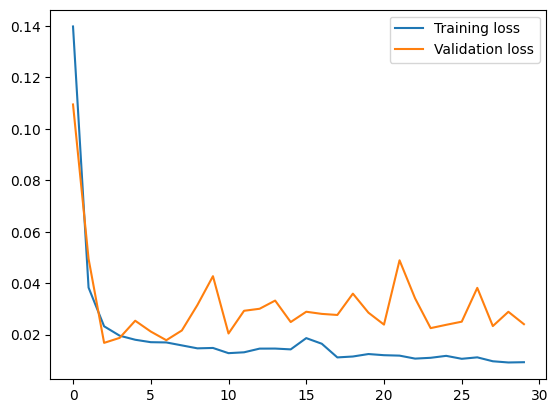

2/2 [==============================] - 1s 5ms/step
(56, 1) (56, 1)
(56,)
(56,)


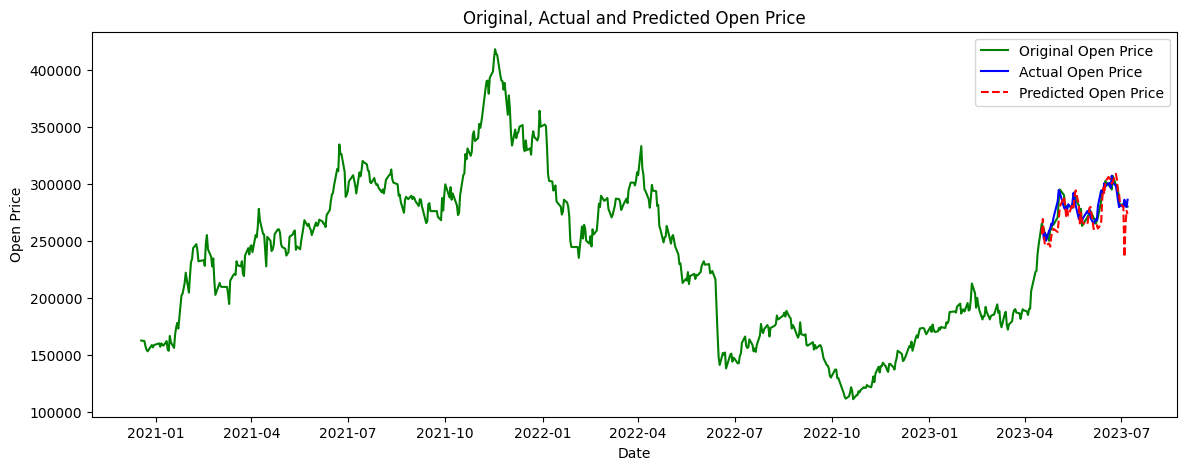

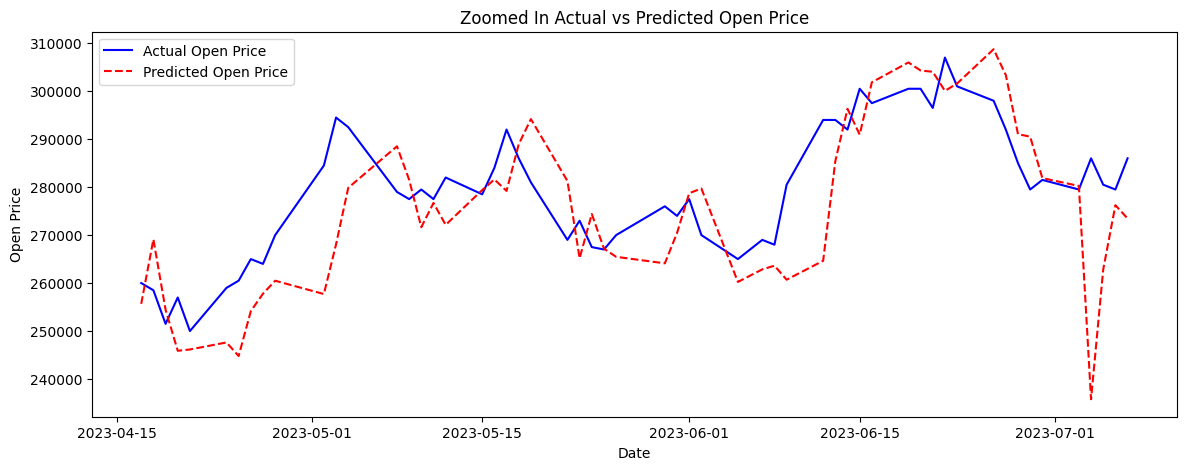

,Results
MAE,9184.47604
RMSE,12475.32974
RMSLE,0.04610
R2,0.16520


In [ ]:
#####모델학습_연습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# GRU 모델
model = Sequential()
model.add(GRU(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
              return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-7  # 작은 상수
decay = 0.0  # 학습률 감소 비율

optimizer = Adam(
    learning_rate=learning_rate,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon
)

model.compile(optimizer=optimizer, loss='mse')

# weight 저장 및 로드
import os

# 디렉토리 생성
save_dir = '/content/gdrive/MyDrive/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 모델 가중치 저장
model.save_weights(os.path.join(save_dir, 'gru_weights.h5'))



history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
#훈련시킨 후 모델 저장
model.save_weights('/content/gdrive/MyDrive/gru_weights.h5')

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,0]
print(y_pred.shape)

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,0]
print(testY_original.shape)


# 오리지널 시가 plot
plt.figure(figsize=(14, 5))
plt.plot(dates, original_open, color='green', label='Original Open Price')

# 실제 vs 예측
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# 확대 plot 범위 설정
zoom_start = 0
zoom_end = len(test_dates)

# 확대 plot
plt.figure(figsize=(14, 5))
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[seq_len:],
         testY_original,
         color='blue',
         label='Actual Open Price')
plt.plot(test_dates[seq_len:],
         y_pred,
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()


# @title 성능 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(testY_original, y_pred):
  MAE = mean_absolute_error(testY_original, y_pred)
  RMSE = np.sqrt(mean_squared_error(testY_original, y_pred))
  MSLE = mean_squared_log_error(testY_original, y_pred)
  RMSLE = np.sqrt(mean_squared_log_error(testY_original, y_pred))
  R2 = r2_score(testY_original, y_pred)

  pd.options.display.float_format = '{:.5f}'.format
  Result = pd.DataFrame(data=[MAE, RMSE, RMSLE, R2],
                        index = ['MAE', 'RMSE', 'RMSLE', 'R2'],
                        columns=['Results'])
  return Result
result = confirm_result(testY_original, y_pred)
result